In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten
from tensorflow.keras import backend as k
import matplotlib.pyplot as plt

In [10]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [11]:
from tensorflow.keras import backend as k

img_rows, img_cols = 28, 28

# Check the data format (channels_first or channels_last)
if k.image_data_format() == 'channels_first':
    # Reshape X_train and X_test to (n_samples, 1, img_rows, img_cols) for 'channels_first'
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    inpx = (1, img_rows, img_cols)  # Input shape for 'channels_first'
else:
    # Reshape X_train and X_test to (n_samples, img_rows, img_cols, 1) for 'channels_last'
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    inpx = (img_rows, img_cols, 1)  # Input shape for 'channels_last'

# Convert the pixel values to float32 and normalize to [0, 1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [12]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [13]:
inpx = Input(shape=inpx)
layer1 = Conv2D(32,kernel_size=(3,3),activation='relu')(inpx)
layer2 = Conv2D(64,(3,3),activation='relu')(layer1)

layer3 = MaxPooling2D(pool_size=(3,3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)

layer6 = Dense(250,activation='sigmoid')(layer5)
layer7 = Dense(10,activation='softmax')(layer6)

In [16]:
model = Model([inpx],layer7)
model.compile(optimizer=tf.optimizers.Adadelta(),
             loss = tf.losses.categorical_crossentropy,
             metrics=['accuracy'])
model.fit(X_train,y_train,epochs=12,batch_size=500)

Epoch 1/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 109ms/step - accuracy: 0.1026 - loss: 2.3931
Epoch 2/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.0996 - loss: 2.3860
Epoch 3/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step - accuracy: 0.1031 - loss: 2.3715
Epoch 4/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 13s 112ms/step - accuracy: 0.1010 - loss: 2.3628
Epoch 5/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step - accuracy: 0.1034 - loss: 2.3511
Epoch 6/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step - accuracy: 0.1004 - loss: 2.3440
Epoch 7/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 118ms/step - accuracy: 0.1027 - loss: 2.3333
Epoch 8/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 15s 123ms/step - accuracy: 0.1013 - loss: 2.3252
Epoch 9/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 13s 112ms/step - accuracy: 0.1030 - loss: 2.3167
Epoch 10/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step - accuracy: 0.1005 - loss: 2.3107
Epoch 11/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step - accuracy: 0.1027 - loss: 2.3012
Epoch 12/12
120/120

In [17]:
score = model.evaluate(X_test,y_test,verbose=0)
print('loss =',score[0])
print('accuracy =',score[1])

loss = 2.288311243057251
accuracy = 0.10100000351667404


In [18]:
ypred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [19]:
ypred[0]

array([0.06997492, 0.11409887, 0.10964023, 0.14900264, 0.06633915,
       0.09086925, 0.10451635, 0.10108634, 0.0916172 , 0.10285506],
      dtype=float32)

In [20]:
np.argmax(ypred[6])

3

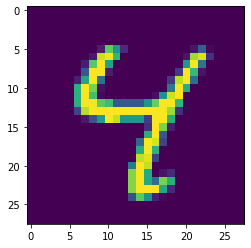

In [21]:
plt.imshow(X_test[6])